In [1]:
import os
import pandas as pd

data_dir = '../data'
dfs = []
for filename in os.listdir(data_dir):
    if filename.endswith('.csv'):
        filepath = os.path.join(data_dir, filename)
        df = pd.read_csv(filepath)
        dfs.append(df)
all_data = pd.concat(dfs, ignore_index=True)

### Activity Summary

Calculates the active vs. inactive users (users with seat assignments that haven't used Copilot).

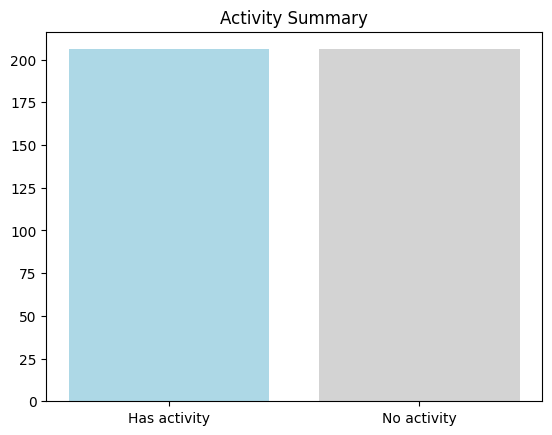

In [2]:
import matplotlib.pyplot as plt

activity_counts = all_data['Last Activity Date'].value_counts()
no_activity_count = all_data['Last Activity Date'].isna().count()
activity_counts['No activity'] = no_activity_count

labels = ['Has activity', 'No activity']
sizes = [activity_counts[0], no_activity_count]
colors = ['lightblue', 'lightgray']

plt.bar(labels, sizes, color=colors)
plt.title('Activity Summary')
plt.show()

### Editor Usage Summary

Provides a summary of the editor usage.

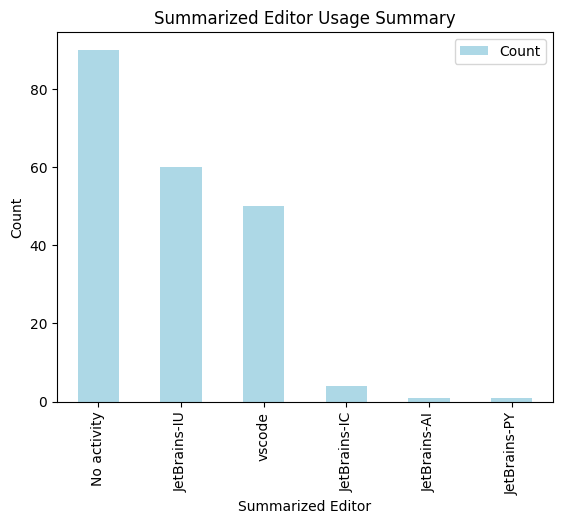

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

def summarize_editor(editor):
    return editor.split('/')[0]

all_data['Summarized Editor'] = all_data['Last Editor Used'].apply(summarize_editor)
editor_counts = all_data['Summarized Editor'].value_counts().reset_index(name='Count')

editor_counts.plot(kind='bar', x='index', y='Count', color='lightblue')
plt.title('Summarized Editor Usage Summary')
plt.xlabel('Summarized Editor')
plt.ylabel('Count')
plt.show()

### Last Activity Date Histogram

Shows the distribution of the last activity date for users.

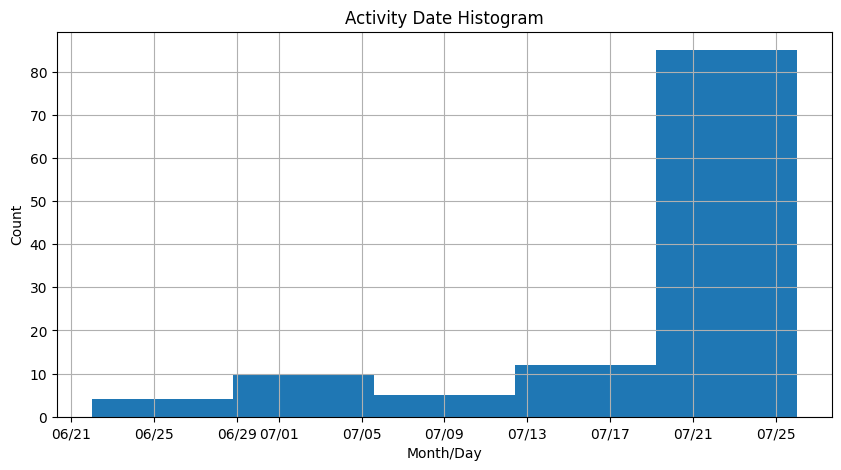

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

activity_data = all_data[['Last Activity Date']]
activity_data = activity_data[activity_data['Last Activity Date'] != 'No activity']
activity_data['Last Activity Date'] = pd.to_datetime(activity_data['Last Activity Date'])
activity_data['Month/Day'] = activity_data['Last Activity Date'].dt.strftime('%m/%d')

fig, ax = plt.subplots(figsize=(10, 5))
activity_data.hist(bins=5, ax=ax)
plt.xlabel('Month/Day')
plt.ylabel('Count')
plt.title('Activity Date Histogram')

# Format x-axis labels to show only month and day
date_format = mdates.DateFormatter('%m/%d')
ax.xaxis.set_major_formatter(date_format)

plt.show()

### Usage by Team 

Shows the number of seat assignments and active users by team.

In [ ]:
import pandas as pd

def is_active(date):
    return pd.notnull(date) and date != 'No activity'

all_data['Active'] = all_data['Last Activity Date'].apply(is_active)
team_counts = all_data.groupby('Team')['Active'].agg(['count', 'sum']).reset_index()
team_counts.columns = ['Team', 'Total Count', 'Active Count']

# Add a footer row that sums up the Total Count and the Active Count
team_counts.loc['Total'] = ['All Teams', team_counts['Total Count'].sum(), team_counts['Active Count'].sum()]

print(team_counts)